In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import SimpleImputer

In [3]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Install pyreadr library
!pip install pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 6.4 MB/s eta 0:00:00


In [5]:
# Read the data from .RDS files
import pyreadr
data =  pyreadr.read_r('/content/drive/MyDrive/Capston/2019_1min_df.RDS')
df_2019 = data[None]
data = pyreadr.read_r('/content/drive/MyDrive/Capston/2020_1min_df.RDS')
df_2020 = data[None]
data = pyreadr.read_r('/content/drive/MyDrive/Capston/2021_1min_df.RDS')
df_2021 = data[None]
data = pyreadr.read_r('/content/drive/MyDrive/Capston/2022_1min_df.RDS')
df_2022 = data[None]
data = pyreadr.read_r('/content/drive/MyDrive/Capston/2023_1min_df.RDS')
df_2023 = data[None]

# Load Boat Lauch data
data1 =  pyreadr.read_r('/content/drive/MyDrive/Capston/2019_boat_launch_1min_df.RDS')
df1_2019 = data1[None]
data1 = pyreadr.read_r('/content/drive/MyDrive/Capston/2020_boat_launch_1min_df.RDS')
df1_2020 = data1[None]
data1 = pyreadr.read_r('/content/drive/MyDrive/Capston/2021_boat_launch_1min_df.RDS')
df1_2021 = data1[None]
data1 = pyreadr.read_r('/content/drive/MyDrive/Capston/2022_boat_launch_1min_df.RDS')
df1_2022 = data1[None]
data1 = pyreadr.read_r('/content/drive/MyDrive/Capston/2023_boat_launch_1min_df.RDS')
df1_2023 = data1[None]

In [6]:
# Merge all the dataframes to form one dataframe.
df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

In [7]:
df1 = pd.concat([df1_2019, df1_2020, df1_2021, df1_2022, df1_2023], ignore_index=True)

In [8]:
# Fill Null Values using foward fill and backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [9]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.set_index('datetime_utc', inplace=True)
df = df.resample('H').mean()
df

<ipython-input-9-3bda5c55ec2b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('H').mean()


,Wells_Total_Discharge,Chelan_Flow,Entiat_Flow,Rocky_Reach_Total_Discharge,Wenatchee_Flow,Rock_Island_Total_Discharge,Rock_Island_Headwater_Elevation,Rocky_Reach_Headwater_Elevation
datetime_utc,,,,,,,,
2019-01-01 08:00:00+00:00,55.782484,2.388145,0.000000,56.577421,1.820301,84.675652,612.808739,705.592027
2019-01-01 09:00:00+00:00,58.217621,2.390016,0.000000,44.342671,1.813016,50.692234,612.811689,705.699822
2019-01-01 10:00:00+00:00,58.181399,2.391888,0.000000,50.363475,1.805726,38.137940,612.845646,705.663103
2019-01-01 11:00:00+00:00,65.596117,2.393515,0.000000,52.985089,1.798436,53.526772,612.852758,705.760086
2019-01-01 12:00:00+00:00,74.356003,2.393714,0.000000,53.973098,1.791147,60.068357,612.854190,705.861713
...,...,...,...,...,...,...,...,...
2024-01-01 03:00:00+00:00,117.311452,0.843272,0.182000,125.727347,1.590859,143.432978,612.284803,704.974359
2024-01-01 04:00:00+00:00,117.408496,0.841946,0.182000,137.445026,1.590437,136.776287,612.061396,704.797767
2024-01-01 05:00:00+00:00,112.399234,0.831475,0.179802,133.152166,1.590015,133.969716,612.280278,704.591913


### Original Rocky Reach Inflow Calculation

Wells Flow Impact = flows averaged from previous 90-105 minutes

Chelan Flow Impact = flows averaged from previous 62-77 minutes (60-75 should be fine)

Entiat Flow Impact = flows averaged from previous 15-30 minutes

Rocky Reach Inflow = Wells Flow Impact + Chelan Flow Impact + Entiat Flow Impact

# change in the calculations based on the hourly data modification.

Wells Flow Impact: Shift by 2 hours (as an approximation of 90-105 minutes).

Chelan Flow Impact: Shift by 1 hour (as an approximation of 60-75 minutes).

Entiat Flow Impact: Since we can't precisely target 15-30 minutes with hourly data, we'll use a direct 1-hour shift to reflect recent changes.

In [10]:

# Demonstrating adjusted calculations based on the user's requirements and hourly aggregated data

# Calculate Wells Flow Impact - approximated for a broader window given hourly data
df['Wells_Flow_Impact_Adj'] = df['Wells_Total_Discharge'].shift(2).rolling(window=2).mean()
df['Wells_Flow_Impact_Adj'].fillna(method='bfill', inplace=True)

# Calculate Chelan Flow Impact - approximated for a window reflective of the hourly aggregation
df['Chelan_Flow_Impact_Adj'] = df['Chelan_Flow'].shift(1).rolling(window=2).mean()
df['Chelan_Flow_Impact_Adj'].fillna(method='bfill', inplace=True)

# Calculate Entiat Flow Impact - considering the immediate past hour as we can't precisely match 15-30 minutes
df['Entiat_Flow_Impact_Adj'] = df['Entiat_Flow'].shift(1).rolling(window=1).mean()
df['Entiat_Flow_Impact_Adj'].fillna(method='bfill', inplace=True)

# Calculate Rocky Reach Inflow with adjusted impacts
df['Rocky_Reach_Inflow_Adj'] = df['Wells_Flow_Impact_Adj'] + df['Chelan_Flow_Impact_Adj'] + df['Entiat_Flow_Impact_Adj']

# Display the updated DataFram
df[['Wells_Flow_Impact_Adj', 'Chelan_Flow_Impact_Adj', 'Entiat_Flow_Impact_Adj', 'Rocky_Reach_Inflow_Adj']].head()

,Wells_Flow_Impact_Adj,Chelan_Flow_Impact_Adj,Entiat_Flow_Impact_Adj,Rocky_Reach_Inflow_Adj
datetime_utc,,,,
2019-01-01 08:00:00+00:00,57.000053,2.389081,0.0,59.389134
2019-01-01 09:00:00+00:00,57.000053,2.389081,0.0,59.389134
2019-01-01 10:00:00+00:00,57.000053,2.389081,0.0,59.389134
2019-01-01 11:00:00+00:00,57.000053,2.390952,0.0,59.391005
2019-01-01 12:00:00+00:00,58.199510,2.392702,0.0,60.592212


In [11]:
# Sort DataFrame by 'datetime_utc'
df.sort_values(by='datetime_utc', inplace=True)

# Calculate Wells Flow Impact
df['Wells_Flow_Impact'] = df['Wells_Total_Discharge'].shift(105).rolling(window=16).mean()
df['Wells_Flow_Impact'].fillna(method='bfill', inplace=True)

# Calculate Chelan Flow Impact
df['Chelan_Flow_Impact'] = df['Chelan_Flow'].shift(77).rolling(window=16).mean()
df['Chelan_Flow_Impact'].fillna(method='bfill', inplace=True)

# Calculate Entiat Flow Impact
df['Entiat_Flow_Impact'] = df['Entiat_Flow'].shift(30).rolling(window=16).mean()
df['Entiat_Flow_Impact'].fillna(method='bfill', inplace=True)

# Calculate Rocky Reach Inflow
df['Rocky_Reach_Inflow'] = df['Wells_Flow_Impact'] + df['Chelan_Flow_Impact'] + df['Entiat_Flow_Impact']

# Display the updated DataFrame
df[['Wells_Flow_Impact', 'Chelan_Flow_Impact', 'Entiat_Flow_Impact', 'Rocky_Reach_Inflow']].head()

,Wells_Flow_Impact,Chelan_Flow_Impact,Entiat_Flow_Impact,Rocky_Reach_Inflow
datetime_utc,,,,
2019-01-01 08:00:00+00:00,79.588391,2.393781,0.0,81.982171
2019-01-01 09:00:00+00:00,79.588391,2.393781,0.0,81.982171
2019-01-01 10:00:00+00:00,79.588391,2.393781,0.0,81.982171
2019-01-01 11:00:00+00:00,79.588391,2.393781,0.0,81.982171
2019-01-01 12:00:00+00:00,79.588391,2.393781,0.0,81.982171


# Original Rock Island Inflow Calculation

Rocky Reach Flow Impact = Depends on Rocky Reach Total Discharge (RRTD) at time (now)
Wenatchee Flow Impact = flow from 22 minutes ago

Rocky Reach Flow Timing Logic:

If RRTD <= 50, then Rocky Reach Flow Impact = RRTD from 43 min ago

If RRTD > 50 & RRTD <= 80, then Rocky Reach Flow Impact = RRTD from 45 min ago

If RRTD > 80 & RRTD <= 120, then Rocky Reach Flow Impact = RRTD from 47 min ago

If RRTD > 120 & RRTD <= 150, then Rocky Reach Flow Impact = RRTD from 48 min ago

If RRTD > 150 & RRTD <= 220, then Rocky Reach Flow Impact = RRTD from 50 min ago

If RRTD > 220, then Rocky Reach Flow Impact = RRTD from 50 min ago

Rock Island Inflow = Rocky Reach Flow Impact + Wenatchee Flow Impact

# Change in the calculations based on the hourly data modification.

Rocky Reach Flow Impact:

For simplicity and to fit hourly intervals, we'll adjust the shift logic to fewer categories.

We'll approximate shifts to 1 hour for RRTD <= 80, 2 hours for RRTD > 80 & RRTD <= 150, and 3 hours for RRTD > 150 as a broad approximation.

Wenatchee Flow Impact:

We'll shift by 1 hour to approximate the 22-minute logic in an hourly context.

In [12]:
# Define the simplified conditions and corresponding shifts for hourly intervals
conditions = [80, 150]  # Simplified conditions for hourly data
shifts = [1, 2]  # Approximated shifts in hours
default_shift = 3  # Default shift for RRTD > 150

# Calculate 'Rocky_Reach_Flow_Impact' for hourly intervals
df['Rocky_Reach_Flow_Impact'] = np.select(
    [df['Rocky_Reach_Total_Discharge'] <= condition for condition in conditions],
    [df['Rocky_Reach_Total_Discharge'].shift(shift) for shift in shifts],
    default=df['Rocky_Reach_Total_Discharge'].shift(default_shift)
)
# Fill starting rows with backward fill
df['Rocky_Reach_Flow_Impact'].fillna(method='bfill', inplace=True)

# Calculate 'Wenatchee_Flow_Impact' for hourly intervals with 1 hour shift
df['Wenatchee_Flow_Impact'] = df['Wenatchee_Flow'].shift(1)
df['Wenatchee_Flow_Impact'].fillna(method='bfill', inplace=True)

# Calculate 'Rock Island Inflow' for hourly intervals
df['Rock_Island_Inflow'] = df['Rocky_Reach_Flow_Impact'] + df['Wenatchee_Flow_Impact']

# Display the updated DataFrame with the datetime index
print(df[['Rocky_Reach_Flow_Impact', 'Wenatchee_Flow_Impact', 'Rock_Island_Inflow']].head())

                           Rocky_Reach_Flow_Impact  Wenatchee_Flow_Impact  \
datetime_utc                                                                
2019-01-01 08:00:00+00:00                56.577421               1.820301   
2019-01-01 09:00:00+00:00                56.577421               1.820301   
2019-01-01 10:00:00+00:00                44.342671               1.813016   
2019-01-01 11:00:00+00:00                50.363475               1.805726   
2019-01-01 12:00:00+00:00                52.985089               1.798436   

                           Rock_Island_Inflow  
datetime_utc                                   
2019-01-01 08:00:00+00:00           58.397722  
2019-01-01 09:00:00+00:00           58.397722  
2019-01-01 10:00:00+00:00           46.155687  
2019-01-01 11:00:00+00:00           52.169201  
2019-01-01 12:00:00+00:00           54.783526  


##Fill Rates

In [13]:
# Calculate fill rate at both dams
df['Rocky_Reach_Fill_Rate'] = df['Rocky_Reach_Inflow_Adj'] - df['Rocky_Reach_Total_Discharge']
df['Rock_Island_Fill_Rate'] = df['Rock_Island_Inflow'] - df['Rock_Island_Total_Discharge']

# Display the updated DataFrame
df[['Rocky_Reach_Fill_Rate','Rock_Island_Fill_Rate']].head()

,Rocky_Reach_Fill_Rate,Rock_Island_Fill_Rate
datetime_utc,,
2019-01-01 08:00:00+00:00,2.811713,-26.277930
2019-01-01 09:00:00+00:00,15.046462,7.705488
2019-01-01 10:00:00+00:00,9.025659,8.017748
2019-01-01 11:00:00+00:00,6.405915,-1.357571
2019-01-01 12:00:00+00:00,6.619114,-5.284831


## Headwater Elevation Change Vs Fill Rate

In [14]:
# Calculate the change in Rocky Reach headwater elevation
df['Rocky_Reach_Headwater_Elevation_Change'] = df['Rocky_Reach_Headwater_Elevation'].diff()
df['Rocky_Reach_Headwater_Elevation_Change'].fillna(method='ffill', inplace=True)
df['Rocky_Reach_Headwater_Elevation_Change'].fillna(method='bfill', inplace=True)

# Calculate the correlation between Rocky Reach Fill Rate and Headwater Elevation Change
rocky_reach_correlation = df['Rocky_Reach_Fill_Rate'].corr(df['Rocky_Reach_Headwater_Elevation_Change'])
print(f'Correlation between Rocky Reach Fill Rate and Headwater Elevation Change: {rocky_reach_correlation}')

Correlation between Rocky Reach Fill Rate and Headwater Elevation Change: 0.630009357043848


## Model for Rocky Reach

Mean Squared Error for Rocky Reach Dam: 0.027231345085272876
R-squared for Rocky Reach Dam: 0.40090982407472453


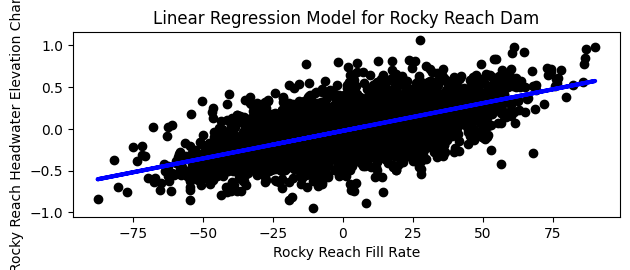

In [15]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Prepare data for modeling for Rocky Reach Dam
X_rocky_reach = df[['Rocky_Reach_Fill_Rate']]
y_rocky_reach = df['Rocky_Reach_Headwater_Elevation_Change']

# Impute missing values in X_rocky_reach
X_rocky_reach_imputed = imputer.fit_transform(X_rocky_reach)

# Since the imputation removes the DataFrame structure, if you need to maintain the DataFrame:
X_rocky_reach_imputed_df = pd.DataFrame(X_rocky_reach_imputed, columns=X_rocky_reach.columns)

# Now split the data again with the imputed values
X_train_rocky_reach, X_test_rocky_reach, y_train_rocky_reach, y_test_rocky_reach = train_test_split(
    X_rocky_reach_imputed_df, y_rocky_reach, test_size=0.2, random_state=42
)

# Create a linear regression model for Rocky Reach Dam
model_rocky_reach = LinearRegression()

# Train the model for Rocky Reach Dam
model_rocky_reach.fit(X_train_rocky_reach, y_train_rocky_reach)

# Make predictions on the test set for Rocky Reach Dam
y_pred_rocky_reach = model_rocky_reach.predict(X_test_rocky_reach)

# Evaluate the model for Rocky Reach Dam
mse_rocky_reach = mean_squared_error(y_test_rocky_reach, y_pred_rocky_reach)
r2_rocky_reach = r2_score(y_test_rocky_reach, y_pred_rocky_reach)

print(f'Mean Squared Error for Rocky Reach Dam: {mse_rocky_reach}')
print(f'R-squared for Rocky Reach Dam: {r2_rocky_reach}')

# Plot the regression line for Rocky Reach Dam
plt.subplot(2, 1, 2)
plt.scatter(X_test_rocky_reach, y_test_rocky_reach, color='black')
plt.plot(X_test_rocky_reach, y_pred_rocky_reach, color='blue', linewidth=3)
plt.title('Linear Regression Model for Rocky Reach Dam')
plt.xlabel('Rocky Reach Fill Rate')
plt.ylabel('Rocky Reach Headwater Elevation Change')

plt.tight_layout()
plt.show()

In [16]:
model_rocky_reach.coef_

array([0.00663594])

## Model for Rock Island

In [17]:
# Calculate the change in headwater elevation
df['Rock_Island_Headwater_Elevation_Change'] = df['Rock_Island_Headwater_Elevation'].diff()
df['Rock_Island_Headwater_Elevation_Change'].fillna(method='ffill', inplace=True)
df['Rock_Island_Headwater_Elevation_Change'].fillna(method='bfill', inplace=True)
# Calculate the correlation between Fill Rate and Headwater Elevation Change
correlation = df['Rock_Island_Fill_Rate'].corr(df['Rock_Island_Headwater_Elevation_Change'])
print(f'Correlation between Rock Island Fill Rate and Headwater Elevation Change: {correlation}')

Correlation between Rock Island Fill Rate and Headwater Elevation Change: 0.28820015232476925


Mean Squared Error for Rock Island Dam: 0.06432630554049536
R-squared for Rock Island Dam: 0.08112705265641007


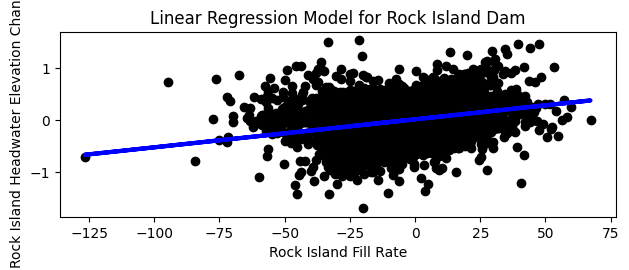

In [18]:
# Prepare data for modeling for Rock Island Dam
X_rock_island = df[['Rock_Island_Fill_Rate']]
y_rock_island = df['Rock_Island_Headwater_Elevation_Change']

# Split the data into training and testing sets
X_train_rock_island, X_test_rock_island, y_train_rock_island, y_test_rock_island = train_test_split(
    X_rock_island, y_rock_island, test_size=0.2, random_state=42
)

# Create a linear regression model for Rock Island Dam
model_rock_island = LinearRegression()

# Train the model for Rock Island Dam
model_rock_island.fit(X_train_rock_island, y_train_rock_island)

# Make predictions on the test set for Rock Island Dam
y_pred_rock_island = model_rock_island.predict(X_test_rock_island)

# Evaluate the model for Rock Island Dam
mse_rock_island = mean_squared_error(y_test_rock_island, y_pred_rock_island)
r2_rock_island = r2_score(y_test_rock_island, y_pred_rock_island)

print(f'Mean Squared Error for Rock Island Dam: {mse_rock_island}')
print(f'R-squared for Rock Island Dam: {r2_rock_island}')

# Plot the regression line for Rock Island Dam
plt.subplot(2, 1, 2)
plt.scatter(X_test_rock_island, y_test_rock_island, color='black')
plt.plot(X_test_rock_island, y_pred_rock_island, color='blue', linewidth=3)
plt.title('Linear Regression Model for Rock Island Dam')
plt.xlabel('Rock Island Fill Rate')
plt.ylabel('Rock Island Headwater Elevation Change')

plt.tight_layout()
plt.show()

## PCA Modeling for rocky reach

In [30]:
# Adjusting lag features for hourly data
# Rocky Reach Headwater Elevation lag for the last 2 hours
for lag in range(1, 3):
    df[f'Rocky_Reach_Headwater_Elevation_lag_{lag}h'] = df['Rocky_Reach_Headwater_Elevation'].shift(lag)

# Rocky Reach Discharge lag for the last 2 hours
for lag in range(1, 3):
    df[f'Rocky_Reach_Total_Discharge_lag_{lag}h'] = df['Rocky_Reach_Total_Discharge'].shift(lag)

# Since we're working with hourly data, the direct application of specific minute lags (like 90 to 105 for Wells, 62 to 77 for Chelan, and 15 to 30 for Entiat) is not practical. Instead, you have already adjusted these impacts with shift and rolling mean methods earlier. If you need to apply additional lags for these adjusted impacts, you should consider what the purpose of these lags would be in an hourly context and adjust accordingly. For instance:

# Adjusted impacts have been calculated. If you want to create lagged versions of these adjusted impacts (e.g., for the past 2 hours), you could do so directly:
df['Wells_Flow_Impact_Adj_lag_1h'] = df['Wells_Flow_Impact_Adj'].shift(1)
df['Chelan_Flow_Impact_Adj_lag_1h'] = df['Chelan_Flow_Impact_Adj'].shift(1)
df['Entiat_Flow_Impact_Adj_lag_1h'] = df['Entiat_Flow_Impact_Adj'].shift(1)
df['Wells_Flow_Impact_Adj_lag_1h'] = df['Wells_Flow_Impact_Adj'].shift(2)
df['Chelan_Flow_Impact_Adj_lag_1h'] = df['Chelan_Flow_Impact_Adj'].shift(2)


# Note: Since the original detailed lags for Wells, Chelan, and Entiat impacts were for understanding the immediate past flow impacts, the adjustments you've made (and potential additional hourly lags) should align with the goals of your analysis in the context of hourly data.
df.columns

Index(['Wells_Total_Discharge', 'Chelan_Flow', 'Entiat_Flow',
       'Rocky_Reach_Total_Discharge', 'Wenatchee_Flow',
       'Rock_Island_Total_Discharge', 'Rock_Island_Headwater_Elevation',
       'Rocky_Reach_Headwater_Elevation', 'Wells_Flow_Impact_Adj',
       'Chelan_Flow_Impact_Adj', 'Entiat_Flow_Impact_Adj',
       'Rocky_Reach_Inflow_Adj', 'Wells_Flow_Impact', 'Chelan_Flow_Impact',
       'Entiat_Flow_Impact', 'Rocky_Reach_Inflow', 'Rocky_Reach_Flow_Impact',
       'Wenatchee_Flow_Impact', 'Rock_Island_Inflow', 'Rocky_Reach_Fill_Rate',
       'Rock_Island_Fill_Rate', 'Rocky_Reach_Headwater_Elevation_Change',
       'Rock_Island_Headwater_Elevation_Change',
       'Rocky_Reach_Headwater_Elevation_lag_1h',
       'Rocky_Reach_Headwater_Elevation_lag_2h',
       'Rocky_Reach_Total_Discharge_lag_1h',
       'Rocky_Reach_Total_Discharge_lag_2h', 'Wells_Flow_Impact_Adj_lag_1h',
       'Chelan_Flow_Impact_Adj_lag_1h', 'Entiat_Flow_Impact_Adj_lag_1h',
       'Rock_Island_Headwater_Elev

In [31]:
df_rocky_reach = df[['Entiat_Flow',
       'Rocky_Reach_Total_Discharge',
       'Rocky_Reach_Headwater_Elevation',
       'Rock_Island_Headwater_Elevation_Change',
       'Rocky_Reach_Headwater_Elevation_lag_1h',
       'Rocky_Reach_Headwater_Elevation_lag_2h',
       'Rocky_Reach_Total_Discharge_lag_1h',
       'Rocky_Reach_Total_Discharge_lag_2h', 'Wells_Flow_Impact_Adj_lag_1h',
       'Chelan_Flow_Impact_Adj_lag_1h', 'Entiat_Flow_Impact_Adj_lag_1h',
       'Rock_Island_Headwater_Elevation_lag_1',
       'Rock_Island_Headwater_Elevation_lag_2',
       'Rock_Island_Total_Discharge_lag_1',
       'Rock_Island_Total_Discharge_lag_2', 'Wenatchee_Flow_lag_1',
       'Wenatchee_Flow_lag_2', 'Rocky_Reach_Total_Discharge_lag_1',
       'Rocky_Reach_Total_Discharge_lag_2',
       'Rocky_Reach_Total_Discharge_lag_3']]
df_rocky_reach.dropna(inplace = True)

<ipython-input-31-8ff3799e5702>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocky_reach.dropna(inplace = True)


In [32]:
df_rocky_reach.shape

(43821, 20)

## Principal Component Analysis (PCA) and Modeling

In [33]:
# Separate features and target
target = 'Rocky_Reach_Headwater_Elevation'
X = df_rocky_reach.drop(columns=[target])
y = df_rocky_reach[target]  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.pipeline import Pipeline
# Define a pipeline that first imputes missing values then scales the data
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
# Apply the pipeline to your features
X_imputed_scaled = pipeline.fit_transform(X)

# Now apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_imputed_scaled)

# Print the number of components
print(f"Number of components kept: {pca.n_components_}")

Number of components kept: 7


In [24]:
# Assuming y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle = False)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0004161342835408997
R-squared: 0.999032307250624


## For 20 Components

In [36]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Assuming X is the feature set without the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Ensure no NaN values remain
assert not np.isnan(X_scaled).any(), "NaN values found after scaling"

# Perform PCA with a specified number of components, ensuring it does not exceed the feature count
pca = PCA(n_components=min(20, X_scaled.shape[1]))  # Use 20 components or the max available if fewer than 20 features
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle = False)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.038206381099789445
R-squared: 0.9111535880784227


## 10 Components

In [27]:
#pca = PCA(n_components=10)
#X_pca = pca.fit_transform(X)

# Splitting the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

# Model training with Linear Regression
#model = LinearRegression()
#model.fit(X_train, y_train)

# Predictions and evaluation
#y_pred = model.predict(X_test)
#print("Mean Squared Error for Rocky Reach Dam:", mean_squared_error(y_test, y_pred))
#print("R-Squared for Rocky Reach Dam:", r2_score(y_test, y_pred))

In [28]:
#pca = PCA(n_components=20)
#X_pca = pca.fit_transform(X)

# Splitting the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

# Model training with Linear Regression
#model1 = LinearRegression()
#model1.fit(X_train, y_train)

# Predictions and evaluation
#y_pred = model1.predict(X_test)
#print("Mean Squared Error for Rocky Reach Dam:", mean_squared_error(y_test, y_pred))
#print("R-Squared for Rocky Reach Dam:", r2_score(y_test, y_pred))

## PCA Modeling for rock island

In [29]:
# Create a list to hold all the new lagged feature DataFrames
lagged_features = []

# Rock Island Headwater Elevation lag for the last 2 hours
for lag in range(1, 3):
    lagged_feature = df['Rock_Island_Headwater_Elevation'].shift(lag).to_frame(f'Rock_Island_Headwater_Elevation_lag_{lag}')
    lagged_features.append(lagged_feature)

# Rock Island Discharge lag for the last 2 hours
for lag in range(1, 3):
    lagged_feature = df['Rock_Island_Total_Discharge'].shift(lag).to_frame(f'Rock_Island_Total_Discharge_lag_{lag}')
    lagged_features.append(lagged_feature)

# Adjusting Wenatchee Flow Impact to reflect 1 to 2 hours ago, considering your data is now hourly.
for lag in range(1, 3):
    lagged_feature = df['Wenatchee_Flow'].shift(lag).to_frame(f'Wenatchee_Flow_lag_{lag}')
    lagged_features.append(lagged_feature)

# Rocky Reach Discharge Impact for the last 1 to 3 hours
for lag in range(1, 4):
    lagged_feature = df['Rocky_Reach_Total_Discharge'].shift(lag).to_frame(f'Rocky_Reach_Total_Discharge_lag_{lag}')
    lagged_features.append(lagged_feature)

# Concatenate all the lagged features with the original DataFrame
df = pd.concat([df] + lagged_features, axis=1)

In [29]:
df.shape

(43824, 39)

In [30]:
# Create a list of column names for the lagged features
lagged_column_names = [col for col in df.columns if 'lag_' in col]

# Add the current Rock Island Headwater Elevation column name to the list
lagged_column_names.append('Rock_Island_Headwater_Elevation')

# Create the new DataFrame using only the selected columns
df_rock_island = df[lagged_column_names].copy()

df_rock_island.dropna(inplace = True)

# Display the first few rows of the new DataFrame to verify
df_rock_island.shape

(43821, 17)

In [32]:
# Separate features and target
target = 'Rock_Island_Headwater_Elevation'
X = df_rock_island.drop(columns=[target])
y = df_rock_island[target] #Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

# Model training with Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Mean Squared Error for Rock Island Dam:", mean_squared_error(y_test, y_pred))
print("R-Squared for Rock Island Dam:", r2_score(y_test, y_pred))

Mean Squared Error for Rock Island Dam: 0.06830632768045888
R-Squared for Rock Island Dam: 0.6801660536049917


In [39]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

# Model training with Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model1.predict(X_test)
print("Mean Squared Error for Rock Island Dam:", mean_squared_error(y_test, y_pred))
print("R-Squared for Rock Island Dam:", r2_score(y_test, y_pred))

Mean Squared Error for Rock Island Dam: 0.06842508052403151
R-Squared for Rock Island Dam: 0.6796100115530292


## Time Series Analysis

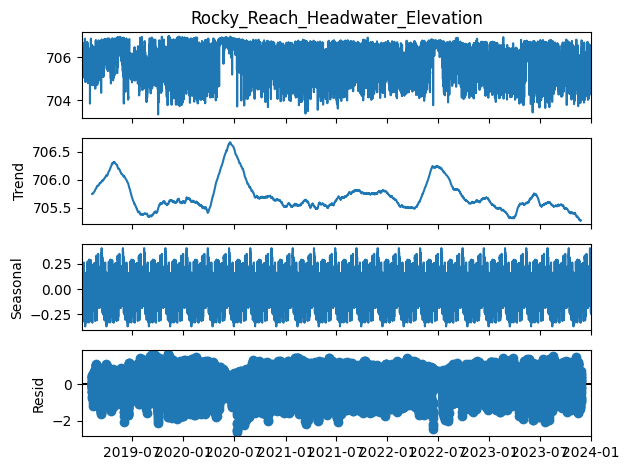

In [40]:
# Perform time series decomposition
series = df['Rocky_Reach_Headwater_Elevation']
result = seasonal_decompose(series, model='additive', period=1825)

# Plot the decomposition
result.plot()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming df is already loaded and the datetime index is set
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime

# Focusing on a single variable for univariate time series analysis
data = df['Rocky_Reach_Headwater_Elevation']

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Define and fit the model on the training data
# Example: ARIMA model, you might need to adjust (p,d,q) based on ACF/PACF plots or other diagnostics
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24))  # example parameters, consider tuning
model_fit = model.fit(disp=False)

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate and print MSE and RMSE
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Boat Lunch data

In [ ]:
df1.fillna(method='ffill', inplace=True)
df1.fillna(method='bfill', inplace=True)
df1.head()